# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID="+weather_api_key
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | isafjordur
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | princeville
Processing Record 5 of Set 1 | bengkulu
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | ust-nera
Processing Record 10 of Set 1 | macau
Processing Record 11 of Set 1 | chonchi
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | bayanhongor
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | buka
Processing Record 19 of Set 1 | la passe
Processing Record 20 of Set 1 | uturoa
Processing Record 21 of Set 1 | georgetown
Processing Record 2

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,isafjordur,66.0755,-23.1240,-4.07,73,18,3.63,IS,1737586526
1,port-aux-francais,-49.3500,70.2167,5.10,78,68,15.74,TF,1737586527
2,edinburgh of the seven seas,-37.0676,-12.3116,17.12,85,82,1.32,SH,1737586528
3,princeville,45.7668,-61.2985,-10.38,79,100,5.66,CA,1737586529
4,bengkulu,-3.8004,102.2655,24.56,85,98,1.80,ID,1737586530


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isafjordur,66.0755,-23.1240,-4.07,73,18,3.63,IS,1737586526
1,port-aux-francais,-49.3500,70.2167,5.10,78,68,15.74,TF,1737586527
2,edinburgh of the seven seas,-37.0676,-12.3116,17.12,85,82,1.32,SH,1737586528
3,princeville,45.7668,-61.2985,-10.38,79,100,5.66,CA,1737586529
4,bengkulu,-3.8004,102.2655,24.56,85,98,1.80,ID,1737586530


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

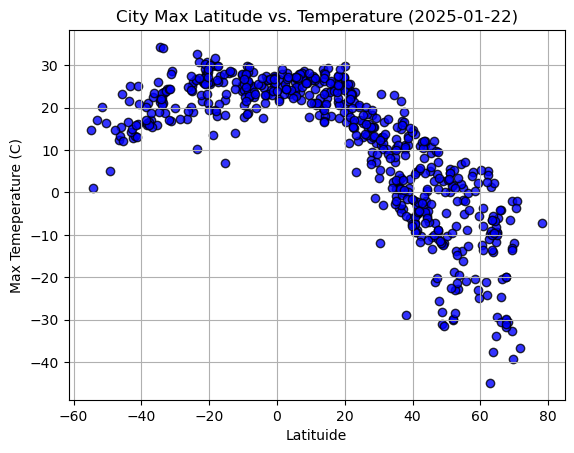

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', facecolor='blue', edgecolor='black', linewidth=1, alpha=0.8)


# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature ({time.strftime('%Y-%m-%d')})")
plt.xlabel('Latituide')
plt.ylabel('Max Temeperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

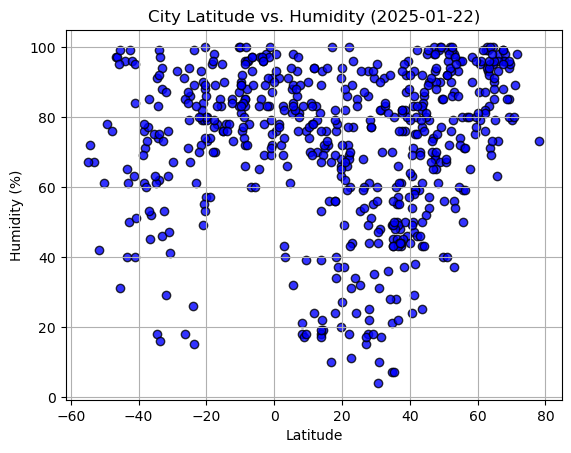

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', facecolor='blue', edgecolor='black', linewidth=1, alpha=0.8)


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({time.strftime('%Y-%m-%d')})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

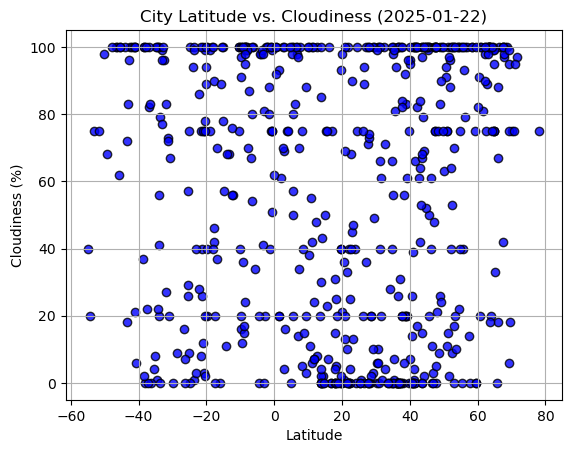

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', facecolor='blue', edgecolor='black', linewidth=1, alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%Y-%m-%d')})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

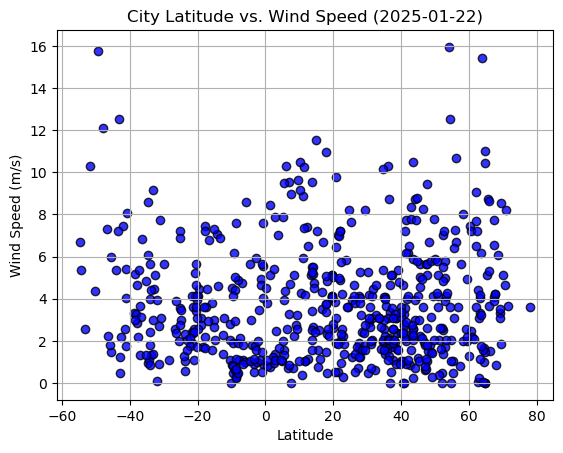

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o',facecolor='blue',edgecolor='black',alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%Y-%m-%d')})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def line_function(x_value,y_value)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return regress_values, line_eq

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isafjordur,66.0755,-23.1240,-4.07,73,18,3.63,IS,1737586526
3,princeville,45.7668,-61.2985,-10.38,79,100,5.66,CA,1737586529
7,ust-nera,64.5667,143.2000,-33.83,100,99,1.01,RU,1737586534
8,macau,22.2006,113.5461,16.85,100,40,2.06,MO,1737586535
13,bayanhongor,46.7167,100.1167,-21.11,74,3,1.93,MN,1737586540


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat']<=0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,5.10,78,68,15.74,TF,1737586527
2,edinburgh of the seven seas,-37.0676,-12.3116,17.12,85,82,1.32,SH,1737586528
4,bengkulu,-3.8004,102.2655,24.56,85,98,1.80,ID,1737586530
5,punta arenas,-53.1500,-70.9167,17.06,67,75,2.57,CL,1737586532
6,grytviken,-54.2811,-36.5092,1.01,72,20,5.36,GS,1737586533


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.7101416668267464


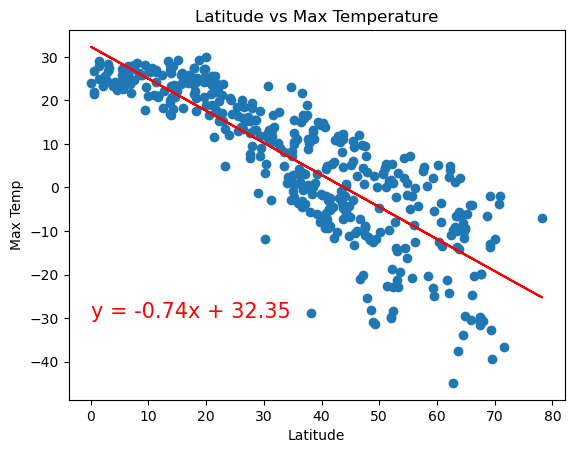

In [37]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"] )

regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"] )

plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(0,-30),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temperature")

print(f"R squared: {rvalue**2}")

plt.show()

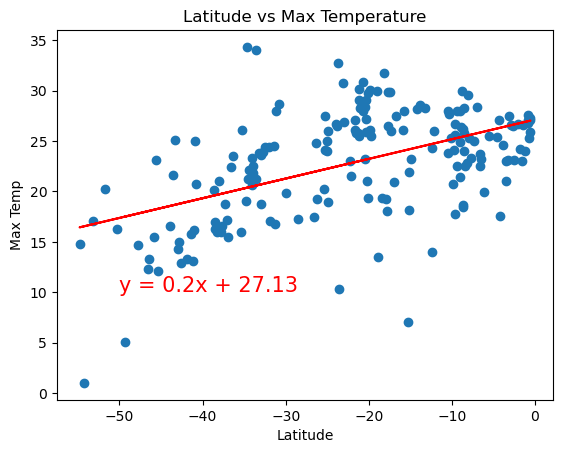

In [39]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"] )

regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"] )

plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temperature")



plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.08550042652093494


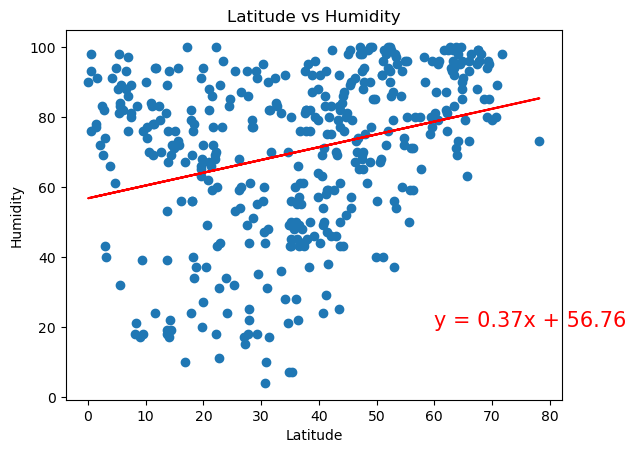

In [48]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"] )

regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"] )

plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")

print(f"R squared: {rvalue**2}")

plt.show()

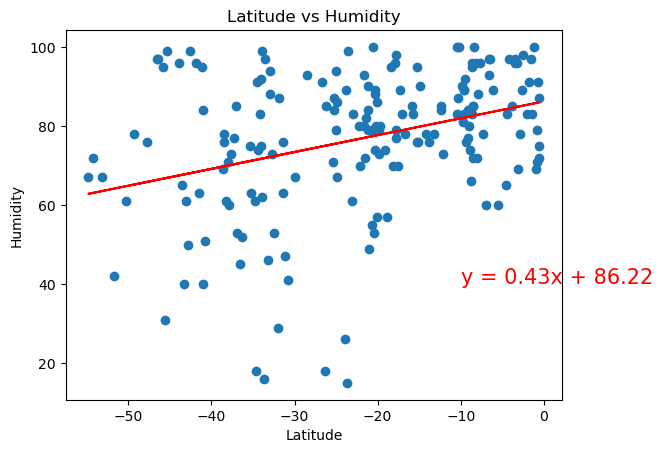

In [52]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"] )

regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"] )

plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-10,40),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")



plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.06298112522763011


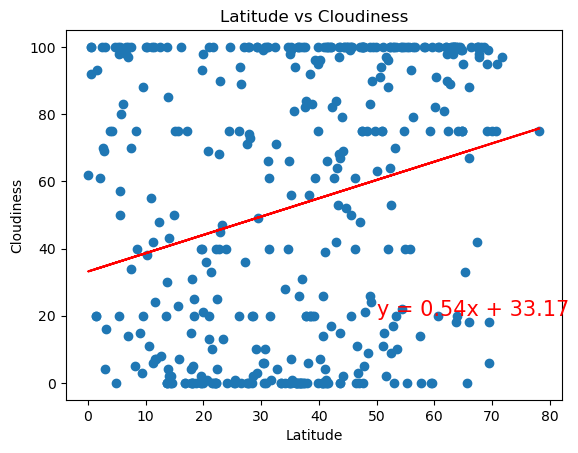

In [49]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"] )

regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"] )

plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")

print(f"R squared: {rvalue**2}")

plt.show()

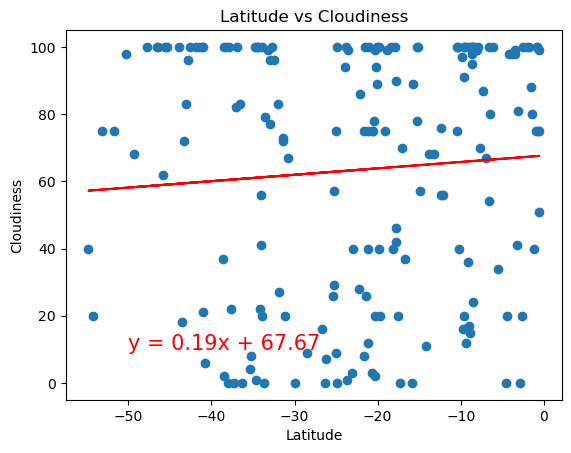

In [43]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"] )

regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"] )

plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")



plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.000777455495146063


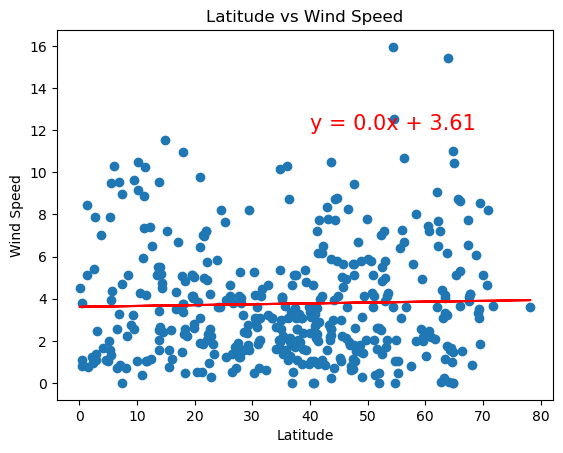

In [51]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"] )

regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"] )

plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(40,12),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")

print(f"R squared: {rvalue**2}")

plt.show()

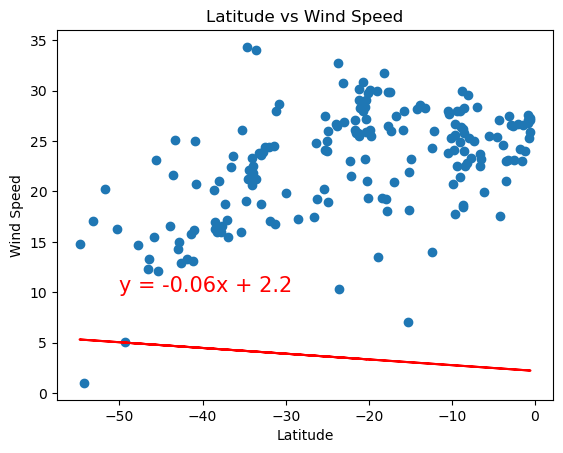

In [ ]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"] )

regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"] )

plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")



plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE